In [1]:
# Adding needed libraries and reading data
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
import re
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [2]:
train = pd.read_csv('C:/Users/Viktoriia/Documents/GWU/Machine Learning_DNSC_6290_11/kaggle/train.csv')
test = pd.read_csv('C:/Users/Viktoriia/Documents/GWU/Machine Learning_DNSC_6290_11/kaggle/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# remove ID column
train.drop(['Id'], axis=1, inplace=True)
#test.drop(['Id'], axis=1, inplace=True)

In [5]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
print ("Train: ",train.shape[0],"rows, and ",train.shape[1],"features")

Train:  1460 rows, and  80 features


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [8]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
#print ("Test: ",test.shape[0],"sales, and ",test.shape[1],"features")

SalePrice is the target variable we need to predict

In [10]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


 mu = 180921.20 and sigma = 79415.29



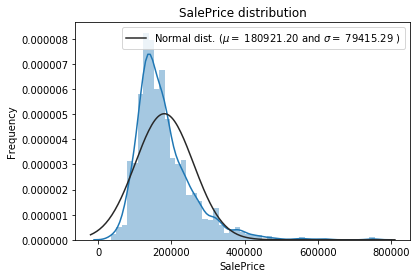

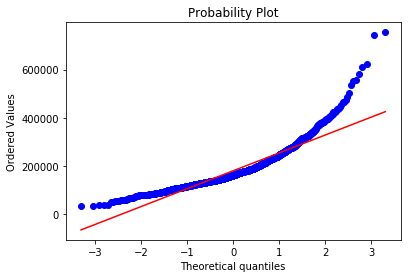

In [11]:
#let's do some analysis on SalePrice
from scipy.stats import norm
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



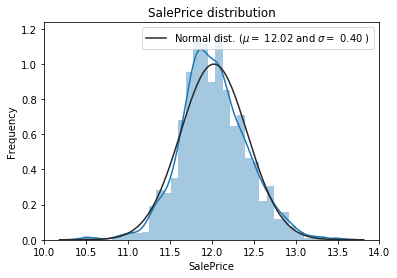

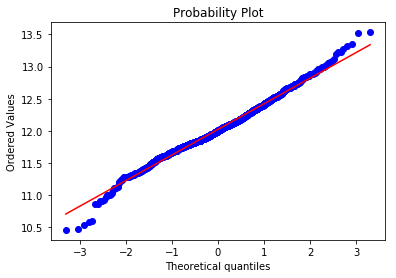

In [12]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

Correlation map

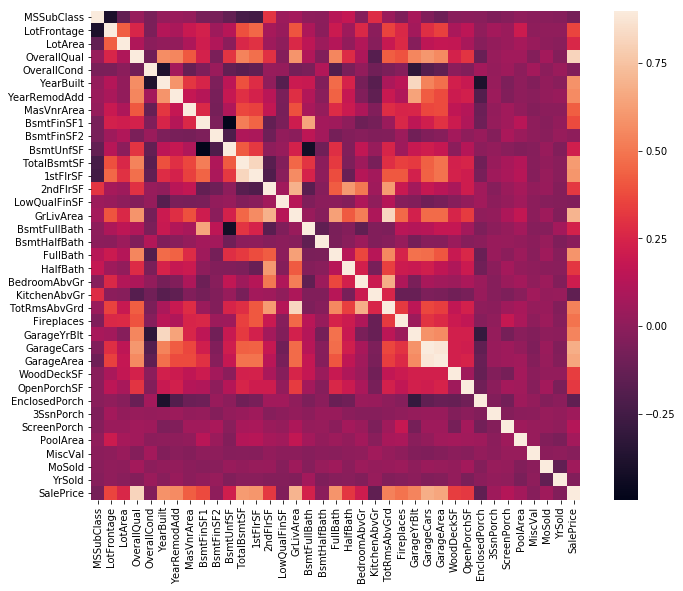

In [13]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [14]:
print (corrmat['SalePrice'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corrmat['SalePrice'].sort_values(ascending=False)[-5:]) #last 5 values

SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
GarageYrBlt     0.541073
TotRmsAbvGrd    0.534422
Fireplaces      0.489450
MasVnrArea      0.430809
BsmtFinSF1      0.372023
Name: SalePrice, dtype: float64 

----------------------
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64


outliers

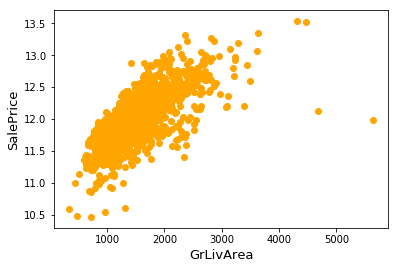

In [15]:
#Let's explore outliers wrt GrLivArea in the training dataset
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'], c = "ORANGE")
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

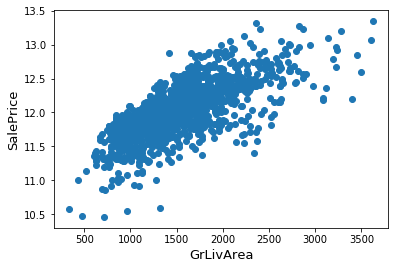

In [16]:
#Deleting outliers, bottom right two with large GrLivArea and low price
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the plot again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [17]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [18]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [19]:
#Now , we are merging train and test datasets , so that we can handle 'noise' and missing data in the dataset .
train_features = train.drop(['SalePrice'], axis=1)
test_features = test
#y = np.ravel(np.array(train[['SalePrice']]))
features = pd.concat([train_features, test_features]).reset_index(drop=True)

In [20]:
features.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [21]:
#missing data, %
total = features.isnull().sum().sort_values(ascending=False)
percent = (features.isnull().sum()/features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,2907,0.997256
MiscFeature,2810,0.963979
Alley,2717,0.932075
Fence,2345,0.804460
Id,1456,0.499485
FireplaceQu,1420,0.487136
LotFrontage,486,0.166724
GarageFinish,159,0.054545
GarageCond,159,0.054545
GarageQual,159,0.054545


In [22]:
features.shape

(2915, 80)

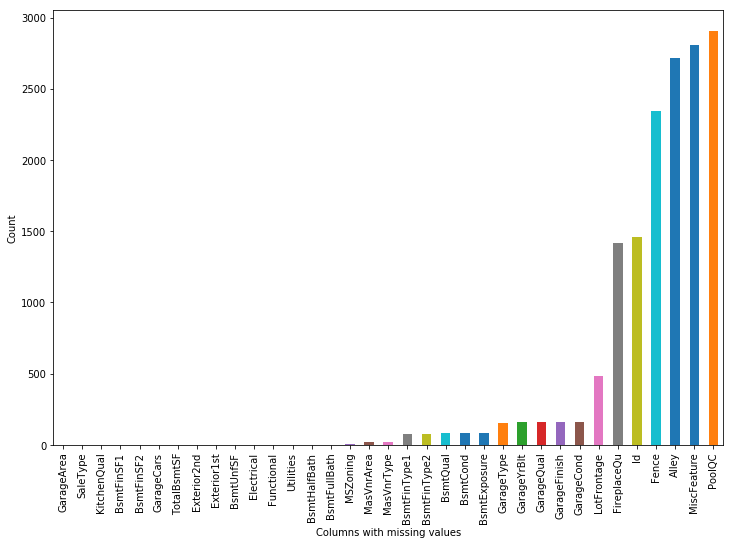

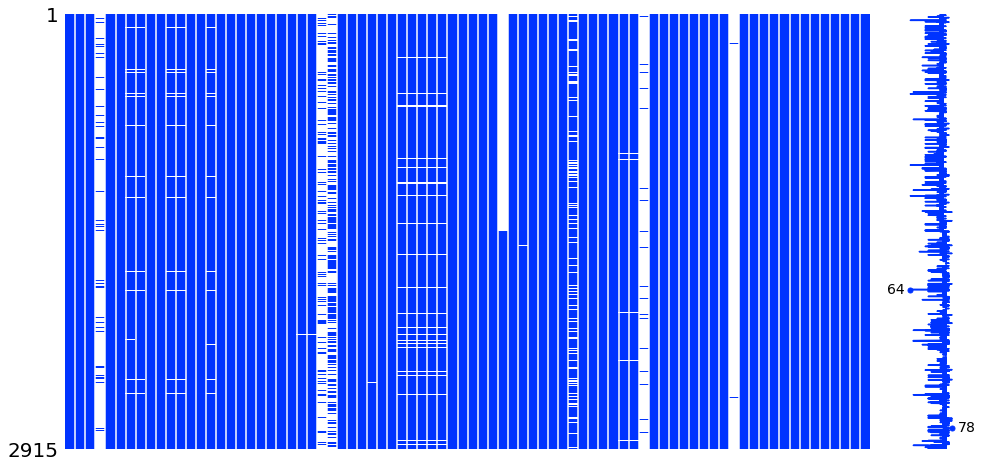

In [23]:
# Plot missing values 
def plot_missing(df):
    # Find columns having missing values and count
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)
    
    # Plot missing values by count 
    missing.plot.bar(figsize=(12,8))
    plt.xlabel('Columns with missing values')
    plt.ylabel('Count')
    
    # search for missing data
    import missingno as msno
    msno.matrix(df=df, figsize=(16,8), color=(0,0.2,1))
    
plot_missing(features)

In [24]:
# IMPUTING MISSING VALUES
def fill_missing_values(df):
    ''' This function imputes missing values with median for numeric columns 
        and most frequent value for categorical columns'''
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    for column in list(missing.index):
        if df[column].dtype == 'object':
            df[column].fillna(df[column].value_counts().index[0], inplace=True)
        elif df[column].dtype == 'int64' or 'float64' or 'int16' or 'float16':
            df[column].fillna(df[column].median(), inplace=True)

In [25]:
fill_missing_values(features)
features.isnull().sum().max()

0

In [26]:
features.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,Grvl,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,Grvl,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,Grvl,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,Grvl,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,Grvl,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [27]:
# Check the state of missing values
total = features.isnull().sum().sort_values(ascending=False)
percent = (features.isnull().sum()/features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
YrSold,0,0.0
YearRemodAdd,0,0.0
ExterCond,0,0.0
ExterQual,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
Fence,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Foundation,0,0.0


In [28]:
#qualitative = [f for f in features.columns if features.dtypes[f] == 'object']
#qualitative
categoricals = features.select_dtypes(exclude=[np.number])
categoricals.describe()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
count,2915,2915,2915,2915,2915,2915,2915,2915,2915,2915,...,2915,2915,2915,2915,2915,2915,2915,2915,2915,2915
unique,2,5,4,4,6,6,4,2,9,8,...,4,25,3,3,7,6,6,9,2,2
top,Grvl,1Fam,TA,No,Unf,Unf,TA,Y,Norm,Norm,...,Shed,NAmes,Y,Gd,CompShg,Gable,Normal,WD,Pave,AllPub
freq,2837,2421,2684,1986,930,2569,1364,2719,2509,2886,...,2905,443,2637,2910,2874,2309,2401,2524,2903,2914


In [29]:
n = categoricals
for c in n.columns:
    print('{:<14}'.format(c), features[c].unique())

Alley          ['Grvl' 'Pave']
BldgType       ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
BsmtCond       ['TA' 'Gd' 'Fa' 'Po']
BsmtExposure   ['No' 'Gd' 'Mn' 'Av']
BsmtFinType1   ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'LwQ']
BsmtFinType2   ['Unf' 'BLQ' 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtQual       ['Gd' 'TA' 'Ex' 'Fa']
CentralAir     ['Y' 'N']
Condition1     ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2     ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosA' 'PosN' 'RRAn' 'RRAe']
Electrical     ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
ExterCond      ['TA' 'Gd' 'Fa' 'Po' 'Ex']
ExterQual      ['Gd' 'TA' 'Ex' 'Fa']
Exterior1st    ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
Exterior2nd    ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
Fence          ['MnPrv' 'GdWo' 'GdPrv

In [30]:
#Imputing Categorical variables
def impute_cats(df):
    '''This function converts categorical and non-numeric 
       columns into numeric columns to feed into a ML algorithm'''
    # Find the columns of object type along with their column index
    object_cols = list(df.select_dtypes(exclude=[np.number]).columns)
    object_cols_ind = []
    for col in object_cols:
        object_cols_ind.append(df.columns.get_loc(col))

    # Encode the categorical columns with numbers    
    label_enc = LabelEncoder()
    for i in object_cols_ind:
        df.iloc[:,i] = label_enc.fit_transform(df.iloc[:,i])

In [31]:
impute_cats(features)
print("Dtype counts: \n{}".format(features.dtypes.value_counts()))

Dtype counts: 
int64      68
float64    12
dtype: int64


In [32]:
n = categoricals
for c in n.columns:
    print('{:<14}'.format(c), features[c].unique())

Alley          [0 1]
BldgType       [0 1 2 4 3]
BsmtCond       [3 1 0 2]
BsmtExposure   [3 1 2 0]
BsmtFinType1   [2 0 5 4 1 3]
BsmtFinType2   [5 1 0 4 3 2]
BsmtQual       [2 3 0 1]
CentralAir     [1 0]
Condition1     [2 1 4 0 5 8 6 3 7]
Condition2     [2 0 7 1 3 4 6 5]
Electrical     [4 1 0 2 3]
ExterCond      [4 2 1 3 0]
ExterQual      [2 3 0 1]
Exterior1st    [12  8 13  6  3 14  5  9  0 11  2  1 10  7  4]
Exterior2nd    [13  8 15  6 10 14  5  3 12  0  2  7  1 11  9  4]
Fence          [2 1 0 3]
FireplaceQu    [2 4 1 0 3]
Foundation     [2 1 0 5 3 4]
Functional     [6 2 0 3 4 1 5]
GarageCond     [4 1 2 3 0]
GarageFinish   [1 2 0]
GarageQual     [4 1 2 0 3]
GarageType     [1 5 3 4 2 0]
Heating        [1 2 3 5 4 0]
HeatingQC      [0 2 4 1 3]
HouseStyle     [5 2 0 1 6 7 4 3]
KitchenQual    [2 3 0 1]
LandContour    [3 0 2 1]
LandSlope      [0 1 2]
LotConfig      [4 2 0 1 3]
LotShape       [3 0 1 2]
MSZoning       [3 4 0 1 2]
MasVnrType     [1 2 3 0]
MiscFeature    [2 0 1 3]
Neighborhood   

In [33]:
#These features are not much related to the SalePrice so we'll drop them.
features=features.drop(columns=['Street','Utilities','Condition2','RoofMatl',
                                'Heating','PoolArea','PoolQC','MiscVal','MiscFeature'],axis=1)

In [34]:
features.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,RoofStyle,SaleCondition,SaleType,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,0,3,0,3,3,706.0,0.0,...,1,4,8,0,8,856.0,0,2003,2003,2008
1,1262,0,0,0,3,0,3,1,978.0,0.0,...,1,4,8,0,6,1262.0,298,1976,1976,2007
2,920,866,0,0,3,0,3,2,486.0,0.0,...,1,4,8,0,6,920.0,0,2001,2002,2008
3,961,756,0,0,3,0,1,3,216.0,0.0,...,1,0,8,0,7,756.0,0,1915,1970,2006
4,1145,1053,0,0,4,0,3,0,655.0,0.0,...,1,4,8,0,9,1145.0,192,2000,2000,2008


In [35]:
y = train['SalePrice'].reset_index(drop=True)
X = features.iloc[:len(y), :]
X_sub = features.iloc[len(y):, :]
X.shape, y.shape, X_sub.shape

((1456, 71), (1456,), (1459, 71))

In [62]:
X_sub.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,RoofStyle,SaleCondition,SaleType,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1456,896,0,0,0,2,0,3,3,468.0,144.0,...,1,4,8,120,5,882.0,140,1961,1961,2010
1457,1329,0,0,0,3,0,3,3,923.0,0.0,...,3,4,8,0,6,1329.0,393,1958,1958,2010
1458,928,701,0,0,3,0,3,3,791.0,0.0,...,1,4,8,0,6,928.0,212,1997,1998,2010
1459,926,678,0,0,3,0,3,3,602.0,0.0,...,1,4,8,0,7,926.0,360,1998,1998,2010
1460,1280,0,0,0,2,4,3,3,263.0,0.0,...,1,4,8,144,5,1280.0,0,1992,1992,2010


Random Forest

In [37]:
# Initialize the model
random_forest = RandomForestRegressor(n_estimators=1200,
                                      max_depth=15,
                                      min_samples_split=5,
                                      min_samples_leaf=5,
                                      max_features=None,
                                      random_state=42,
                                      oob_score=True
                                     )

In [38]:
# Perform cross-validation to see how well our model does 
kf = KFold(n_splits=5)
y_pred = cross_val_score(random_forest, X, y, cv=kf, n_jobs=-1)
y_pred.mean()

0.874225180378869

In [39]:
# Fit the model to our data
random_forest.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [40]:
# Make predictions on test data
rf_pred = random_forest.predict(X_sub)

XG Boost


In [41]:
# Initialize our model
xg_boost = XGBRegressor( learning_rate=0.01,
                         n_estimators=6000,
                         max_depth=4, min_child_weight=1,
                         gamma=0.6, subsample=0.7,
                         colsample_bytree=0.2,
                         objective='reg:linear', nthread=-1,
                         scale_pos_weight=1, seed=127,
                         reg_alpha=0.00006
                       )


In [42]:
# Perform cross-validation to see how well our model does 
kf = KFold(n_splits=5)
y_pred = cross_val_score(xg_boost, X, y, cv=kf, n_jobs=-1)
y_pred.mean()

0.881344362476194

In [43]:
# Fit our model to the training data
xg_boost.fit(X,y)

[18:27:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.2, gamma=0.6,
       importance_type='gain', learning_rate=0.01, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=6000,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1, seed=127,
       silent=None, subsample=0.7, verbosity=1)

In [44]:
# Make predictions on the test data
xgb_pred = xg_boost.predict(X_sub)

Gradient Boost Regressor(GBM)


In [45]:
# Initialize our model
g_boost = GradientBoostingRegressor( n_estimators=6000, learning_rate=0.01,
                                     max_depth=5, max_features='sqrt',
                                     min_samples_leaf=15, min_samples_split=10,
                                     loss='ls', random_state =42
                                   )

In [46]:
# Perform cross-validation to see how well our model does 
kf = KFold(n_splits=5)
y_pred = cross_val_score(g_boost, X, y, cv=kf, n_jobs=-1)
y_pred.mean()

0.9095616319703119

In [47]:
# Fit our model to the training data
g_boost.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=5,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=6000,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)

In [48]:
# Make predictions on test data
gbm_pred = g_boost.predict(X_sub)

LightGBM

In [49]:
# Initialize our model
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=6,
                                       learning_rate=0.01, 
                                       n_estimators=6400,
                                       verbose=-1,
                                       bagging_fraction=0.80,
                                       bagging_freq=4, 
                                       bagging_seed=6,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                    )

In [50]:
# Perform cross-validation to see how well our model does
kf = KFold(n_splits=5)
y_pred = cross_val_score(lightgbm, X, y, cv=kf)
print(y_pred.mean())

0.9127896700553473


In [51]:
# Fit our model to the training data
lightgbm.fit(X,y)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=4, bagging_seed=6,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.2, feature_fraction_seed=7,
       importance_type='split', learning_rate=0.01, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=6400, n_jobs=-1, num_leaves=6, objective='regression',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
       verbose=-1)

In [52]:
# Make predictions on test data
lgb_pred = lightgbm.predict(X_sub)

In [61]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":lgb_pred})
solution.head()

,id,SalePrice
0,1461,11.701407
1,1462,11.976724
2,1463,12.127460
3,1464,12.167430
4,1465,12.149584


In [54]:
solution.to_csv("submit.csv", index = False)